# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # 그냥 transForm도 가능하다.
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.87727927, 0.17147902, 0.81885346])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z +=  X[i] * parameters[i]
    return z

## Logistic Function

## $p =  \frac{1}{1 + e^{-X_i\theta }}$

- sigmoid 함수라고도 부른다.
- 분류 문제를 해결하기 위해 주로 사용한다(0~1의 범위를 갖기 때문)

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / ( 1 + np.exp(-z))    # 로지스틱 함수
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.7533548535671697

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수 == `MSE` 라 한다.
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma\left \{y_iX_i\theta - log( 1 + e^{X_i\theta})\right \} $

아래 내용에선 $ -\Sigma\left \{y_i log( \frac {p_i}{1 -p_i}) + log( 1 - p_i)\right \}$ 로 작성하겠습니다.

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (y * np.log((p) / (1-p))) + np.log(1-p) # 오차값에 로그를 씌운 값입니다.
    return -np.sum(loss)

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = (y - y_hat) ** 2 # Squared error
    return 0.5 * np.sum(loss)

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = (loss / n) #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.3543687197029732

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i - \theta^{T}X_i)X_{ij} = \Sigma(\theta^{T}X_i - y_i )X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)x_{ij}$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = np.sum(y_hat - y) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = np.sum(p-y) * X[j]
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 2, 'logistic')

0.5793058718649838

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [19]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))] # 0으로 초기화했다.
    
    for i in range(len(X_set)): # == X_set.shape[0] 과 같다.
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [20]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[59.134440439184445, 3.4432282373288188, 39.902636991959355]

## mini-batch
인덱스로 미니 배치 나누기

In [21]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch => range 문을 위해 +1을 해줌.
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명
`batch_idx` 는 `X_train` 과 `batch_size` 를 받는다.

`X_train` 은 학습에 사용되는 데이터 행렬이며, `batch_size` 는 미니배치의 크기이다.

함수 내부에서 `N`, `nb` 두개의 변수를 만드는데, 각각 데이터의 개수와, 배치로 나눴을 때 배치 덩어리의 개수이다.

총 데이터의 인덱스 (`N`의 길이)를 `idx` 배열에 저장한다.

그 후에 그것을 `batch_size` 단위로 잘라서 `idx_list` 에 저장한다.

즉 위의 함수는, 전체 데이터로 미니배치 데이터를 만들고, 배치 안에 들어있는 데이터를 인덱스로 표시하여 반환해주는 함수이다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [22]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (learning_rate / n) # 평균을 구하고 학습률을 곱함
    
    parameters -= gradients[i]
    return parameters

In [23]:
step(parameters, gradients1, 0.01, len(X_train)) # 갱신된 파라미터 반환함

array([0.87461909, 0.16881884, 0.81619328])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터를 한번 돌 때 1에포크 증가
- num_epoch: 전체 에포크를 몇 번 반복할 것인지
<br>

BGD: "Batch Gradient Descent" : 학습 한 번에 모든 데이터셋 전체를 순회하며 기울기를 구한다.  
SGD: "Stochasitc Gradient Descent" : 랜덤하게 데이터 몇 개(또는 한 개)를 뽑아서 기울기를 구한다.  
MGD: "Mini batch Gradient Descent" : 미니배치를 사용해(데이터의 일부를) 기울기를 구한다. 미니배치 전체를 돌면 학습 한 번에 모든 데이터셋을 돌게 된다. BGD와 SGD의 장점을 합친 방법으로 볼 수 있다.  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [24]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0]) # 데이터의 feature 개수이다.
    # 성능의 공정한 평가를 위해서 시드 고정
    np.random.seed(0)
    parameters = np.random.rand(N) # 랜덤한 계수로 초기화했다.
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i # 모델에 따라 손실 함수가 달라져야 한다.
    loss = 999 # 임의의 loss(엄청 큰 값)
    batch_idx_list = batch_idx(X_train, batch_size) # 모델을 1배치에 해당하는 X행렬 원소의 인덱스를 넣어 놓은 행렬 생성
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, loss_function) # 배치의 그래디언트를 구한다.
            parameters = step(parameters, gradients, learning_rate, batch_size) # 구한 그래디언트를 미분하여 행렬을 갱신한다.
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size) # 손실 함수를 이용하여 손실값을 구한다.
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                print(f"Early Stopped at loss: {new_loss}") # early stop 표기
                break
            loss = new_loss
            
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

같은 하이퍼파라미터의 모델 간 성능 차이

In [25]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.05, batch_size=len(X_train), tolerance = 0.00001, model="logistic")
new_param_bgd

epoch: 0  loss: 0.9677272641313283  params: [0.53350539 0.69988125 0.58745526]  gradients: [0.015905073327806236, 0.005180187730894569, 0.015308116334578011]
epoch: 100  loss: 0.6472123775798854  params: [-0.21665658 -0.05028072 -0.16270671]  gradients: [0.00835828694439114, -0.008071488942068621, 0.0022873455227756688]
Early Stopped at loss: 0.6460791890728227


array([-0.25815299, -0.09177713, -0.20420312])

In [26]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.05, batch_size=len(X_train), tolerance = 0.00001, model="logistic")
new_param_sgd

epoch: 0  loss: 0.9677272641313283  params: [0.53350539 0.69988125 0.58745526]  gradients: [0.015905073327806236, 0.005180187730894569, 0.015308116334578011]
epoch: 100  loss: 0.6472123775798854  params: [-0.21665658 -0.05028072 -0.16270671]  gradients: [0.00835828694439114, -0.008071488942068621, 0.0022873455227756688]
Early Stopped at loss: 0.6460791890728227


array([-0.25815299, -0.09177713, -0.20420312])

In [27]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.05, batch_size=16, num_epoch = 1000, tolerance = 0.00001, model="logistic")
new_param_mgd

epoch: 0  loss: 0.5289283926833094  params: [0.41065559 0.57703145 0.46460546]  gradients: [0.01135775202378877, 0.010390592477806016, 0.01319902854674179]
epoch: 100  loss: 0.1784799735128428  params: [-0.33862885 -0.17225299 -0.28467898]  gradients: [0.003122524078108122, 0.0024844512496437978, 0.004971729605929294]
epoch: 200  loss: 0.17847996929029325  params: [-0.33862887 -0.17225301 -0.284679  ]  gradients: [0.003122523862029447, 0.002484451042755155, 0.00497172939131419]
epoch: 300  loss: 0.17847996929029308  params: [-0.33862887 -0.17225301 -0.284679  ]  gradients: [0.0031225238620294377, 0.0024844510427551453, 0.00497172939131418]
epoch: 400  loss: 0.17847996929029308  params: [-0.33862887 -0.17225301 -0.284679  ]  gradients: [0.0031225238620294377, 0.0024844510427551453, 0.00497172939131418]
epoch: 500  loss: 0.17847996929029308  params: [-0.33862887 -0.17225301 -0.284679  ]  gradients: [0.0031225238620294377, 0.0024844510427551453, 0.00497172939131418]
epoch: 600  loss: 0.17

array([-0.33862887, -0.17225301, -0.284679  ])

같은 하이퍼파라미터로 비교했을 때 MGD가 가장 적은 loss 를 보였다.

이후 MGD의 하이퍼파라미터를 조정해가며 학습을 비교해 보겠다.

In [28]:
# 배치 사이즈 2배
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.05, batch_size=32, num_epoch = 1000, tolerance = 0.00001, model="logistic")

epoch: 0  loss: 0.7801054684429901  params: [0.47816848 0.64454434 0.53211835]  gradients: [0.011799936842640017, 0.008623766736598808, 0.01765607925473053]
epoch: 100  loss: 0.4126957459228419  params: [-0.33559063 -0.16921476 -0.28164075]  gradients: [0.0026848342358628714, -0.00218887136654188, 0.004219010159612238]
epoch: 200  loss: 0.4126850786311187  params: [-0.33570808 -0.16933221 -0.2817582 ]  gradients: [0.0026835397229278165, -0.0021904714670937936, 0.004217039337701465]
epoch: 300  loss: 0.4126850766367315  params: [-0.3357081  -0.16933224 -0.28175823]  gradients: [0.002683539480792918, -0.0021904717663850824, 0.00421703896906922]
epoch: 400  loss: 0.41268507663635834  params: [-0.3357081  -0.16933224 -0.28175823]  gradients: [0.002683539480747618, -0.0021904717664410745, 0.0042170389690002535]
epoch: 500  loss: 0.41268507663635834  params: [-0.3357081  -0.16933224 -0.28175823]  gradients: [0.0026835394807476105, -0.0021904717664410823, 0.004217038969000245]
epoch: 600  los

배치 사이즈가 증가하니까, 오차가 증가하는 것으로 보였다.

한 배치에 처리해야할 양의 데이터가 많아서 오차가 증가하는 것으로 직관적으로 이해할 수 있을 듯 하다.

In [29]:
# 학습률 0.01 에폭 수 증가
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.01, batch_size=16, num_epoch = 2000, tolerance = 0.00001, model="logistic")

epoch: 0  loss: 0.6072862613061332  params: [0.5203156  0.68669146 0.57426547]  gradients: [0.0024076645454719587, 0.0021868734916866725, 0.002754347384836322]
epoch: 100  loss: 0.184456021427748  params: [-0.31110378 -0.14472792 -0.25715391]  gradients: [0.0006750126197253353, 0.0005454691017361947, 0.0010447287276680584]
epoch: 200  loss: 0.17975566431513915  params: [-0.33256478 -0.16618892 -0.27861491]  gradients: [0.0006289253501337033, 0.0005011245055338196, 0.000998738229791742]
epoch: 300  loss: 0.17960719236979922  params: [-0.333265   -0.16688913 -0.27931512]  gradients: [0.0006274407621498515, 0.0004997020919945801, 0.0009972627392148092]
epoch: 400  loss: 0.1796022841958635  params: [-0.33328817 -0.16691231 -0.2793383 ]  gradients: [0.0006273916534486687, 0.000499655046607651, 0.0009972139380341834]
epoch: 500  loss: 0.17960212169869913  params: [-0.33328894 -0.16691307 -0.27933906]  gradients: [0.0006273900275500772, 0.0004996534890288767, 0.000997212322324253]
epoch: 600 

In [30]:
# 학습률 0.005 # 에폭 수 증가 3000
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.005, batch_size=16, num_epoch = 3000, tolerance = 0.00001, model="logistic")

epoch: 0  loss: 0.6177397323794496  params: [0.53451305 0.70088891 0.58846292]  gradients: [0.001211817169525006, 0.0010995921315023873, 0.0013836537287719175]
epoch: 100  loss: 0.21373968175559577  params: [-0.19985939 -0.03348353 -0.14590952]  gradients: [0.0004642313163376731, 0.00039727377336907393, 0.0006513982554306244]
epoch: 200  loss: 0.18470695661697462  params: [-0.30999446 -0.1436186  -0.25604459]  gradients: [0.00033814371005279917, 0.00027335034644240705, 0.0005230028962854754]
epoch: 300  loss: 0.1806122976745067  params: [-0.32855262 -0.16217676 -0.27460275]  gradients: [0.0003181918234717324, 0.0002541381498189225, 0.0005030783105530107]
epoch: 400  loss: 0.179899813064738  params: [-0.33188633 -0.16551046 -0.27793645]  gradients: [0.00031465241807676397, 0.0002507440805193676, 0.0004995577260740486]
epoch: 500  loss: 0.1797710535004266  params: [-0.33249228 -0.16611642 -0.27854241]  gradients: [0.00031401055404151567, 0.00025012904339920017, 0.0004989197414842908]
epo

In [31]:
# 학습률 0.0001 # 에폭 수 증가 3000
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.0001, batch_size=16, num_epoch = 3000, tolerance = 0.00001, model="logistic")

epoch: 0  loss: 0.62812061138106  params: [0.5485265  0.71490236 0.60247637]  gradients: [2.439047938033802e-05, 2.2109722678612358e-05, 2.7797142149859685e-05]
epoch: 100  loss: 0.6071135720468446  params: [0.52008031 0.68645618 0.57403019]  gradients: [2.403925819393069e-05, 2.18397721636968e-05, 2.7512979620481583e-05]
epoch: 200  loss: 0.5867459113578799  params: [0.4921503  0.65852617 0.54610018]  gradients: [2.3677173396233126e-05, 2.1556540295239516e-05, 2.7214713576050615e-05]
epoch: 300  loss: 0.567031314352197  params: [0.46475435 0.63113021 0.51870422]  gradients: [2.330479763650501e-05, 2.1260203700969453e-05, 2.690258480496404e-05]
epoch: 400  loss: 0.5479816350229141  params: [0.43790979 0.60428565 0.49185966]  gradients: [2.292281778422369e-05, 2.095107681830611e-05, 2.6576982988232825e-05]
epoch: 500  loss: 0.5296066657436156  params: [0.41163322 0.57800908 0.46558309]  gradients: [2.2532033979728926e-05, 2.0629619937088764e-05, 2.6238453304473638e-05]
epoch: 600  loss:

학습률을 많이 낮추지 않는 이상 드라마틱한 변화는 일어나지 않는 것을 확인할 수 있었다.

학습률이 낮아지면 낮아질수록 loss 가 줄어드는 속도가 변화하는 것을 확인할 수 있었다.

이 경우, 시간에 따라서 학습률을 변화시키는  `RMSProp` 이나 `Adam` 과 같은 옵티마이저가 필요할 것 같다.

### Predict Label

In [32]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd) # 학습한 bgd를 가지고 예측 결과 산출
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [33]:
from sklearn.metrics import *

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[35,  5],
       [ 9,  1]])

In [35]:
accuracy = (tp+tn) / (tp+fn+fp+tn) # 구한 값으로 비교
print("accuracy:",accuracy)

accuracy: 0.72


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [36]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [37]:
tmp = np.array([1 for _ in range(150)]) # 편향 1 추가
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [38]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.35767412, 2.75736157])

In [39]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.0001, batch_size=16, num_epoch = 1900, tolerance = 0.00001, model="linear" )
# 선형 모델 생성 후 학습
new_param

epoch: 0  loss: 0.998870471497711  params: [0.54950364 0.7158795 ]  gradients: [-7.562012280425182e-05, -5.9357993741702534e-05]
epoch: 100  loss: 0.9222304676775057  params: [0.61800199 0.78437785]  gradients: [-7.484326619752282e-05, -5.8835078094193e-05]
epoch: 200  loss: 0.8514943882377101  params: [0.68552873 0.8519046 ]  gradients: [-7.412215344387495e-05, -5.835490430851589e-05]
epoch: 300  loss: 0.7863893330606967  params: [0.7521544  0.91853026]  gradients: [-7.345428754672587e-05, -5.791529591539536e-05]
epoch: 400  loss: 0.7266675518809248  params: [0.81794639 0.98432225]  gradients: [-7.283684907680004e-05, -5.7513827845847154e-05]
epoch: 500  loss: 0.6721050261609527  params: [0.88296859 1.04934445]  gradients: [-7.226683719648956e-05, -5.714794502126668e-05]
epoch: 600  loss: 0.6224998757341496  params: [0.94728119 1.11365705]  gradients: [-7.174117968450145e-05, -5.681505420461459e-05]
epoch: 700  loss: 0.5776706830153838  params: [1.01094057 1.17731643]  gradients: [-7.

array([1.73905847, 1.90543433])

In [40]:
y_hat_NE = theta.dot(X.T) # 정규 방정식의 예측 결과
y_hat_GD = new_param.dot(X.T) # 경사하강법의 예측 결과

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

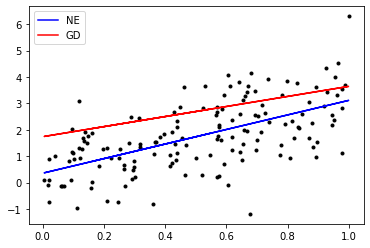

In [41]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

여러 번 시도해본 결과, 1900에폭에서 최소 오차가 나온 것을 확인할 수 있다.

이 이상 발생하면 과적합 등으로 오차가 다시 커지는 것을 확인할 수 있었다. 이는 학습률에 대한 문제로, 학습률을 수정하면 조금 더 정규방정식에 적합해질 것으로 보인다.

실제 에폭을 달리해서 그래프를 확인해 보았는데, 빨간 선(GD) 가 점점 파란 선(NE)에 가까워지는 것을 확인할 수 있었다.